#                           Income prediction     

1. Problem Definition
Salary data is important for many businesses as it can play a significant role in distribution of their resources. For example, a high end product needs to market their goods only to people with high income. A charitable organization may be focused to invest in areas where people make less money. Likewise, it will also help businesses to determine prices of its products and forecast sales. Governments may also be interested to know the status-quo of their citizens to carry out effective economic and development plans.

Since the project determines whether a person makes more than 50K or not, we are determining the dependent categorical variable. Here, we will first collect the relevant data set. Once we collect the data, we will prepare the data using pandas, numpy and visualize the data to determine the relationship between the variables. After studying the data set, we will preprocess the data using python where we will eliminate the outliers and manage missing values. Once we successfully preprocess the data, we will make use of python’s supervised learning packages and algorithms to build our model. Once we prepare the model, we will access the model based upon its accuracy, sensitivity, and specificity. If the model meets our requirements, we will deploy the model to make predictions on income level of individuals.

2. Why problem is important?
Having salary data is important in the business world because it provides businesses an insight that they need. It gives them a better idea regarding what should be consistent, what went well, what didn't go well, and what would have been done differently in the future. Having the right set of data, the business will have a clear vision and an informed decision. Salary data would help people understand as well as improving the business process which might help people reduce the wasted money or time and every company can fill in the gap of this. This would help in depleting the resources or impact the bottom line or anything else which is related. Salary data could be a problem if it is not accounted for as this would not give the business visibility of how much has been paid and how much profit is remaining with the organization for other activity or growth.

2. Understanding Dataset
The original dataset was obtained from the 1994 U.S. Census database. The census is performed every decade within the United States. It gathers information on the population living within the country. The information captured from the census consists of data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc. The sneakpeak of the dataset is as follows: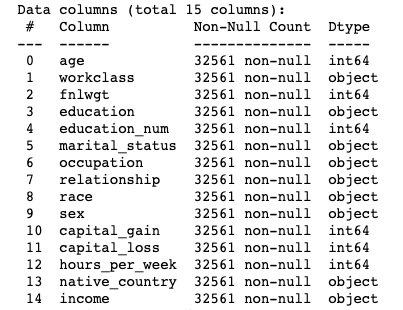
image.png

age: Represents an individual’s years on earth.
workclass: Represents an individual’s employment status
fnlwgt: Represents the final weight. This is the number of people the census believes the entry represents.
education: Represents an individual’s highest level of education achieved in object form.
education-num: Represents an individual’s highest level of education achieved in numerical form.
marital-status: Represents an individual’s civil status in relation to a significant other.
occupation: Represents an individual’s general occupation
relationship: Represents an individual’s relation to others in a family unit. The options aren’t consistent and seem to overlap with marital-status column.
race: Represents an individual’s shared physical or general region of origin
sex: Represents an individual’s gender. This dataset only had two options for gender.
capital-gain: Represents an individual’s profit from the sale of property or an investment
capital-loss: Represents an individual’s loss from the sale of property or an investment
hours-per-week: Represents an individual’s hours worked per week.
native-country: Represents an individual’s country of origin
Income: The amount of money an individual generates within a year.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing  import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso


from joblib import dump, load

## Read Data

In [2]:
df=pd.read_csv('model/income_evaluation.csv')

In [3]:
df.sample(5)         #random data generated each time


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8724,52,Self-emp-inc,177727,10th,6,Married-civ-spouse,Sales,Husband,White,Male,4064,0,45,United-States,<=50K
31773,26,Private,184872,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,55,United-States,>50K
25510,46,Private,294907,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
1369,20,Private,444554,10th,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
27885,36,State-gov,166697,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.duplicated().value_counts()

False    32537
True        24
Name: count, dtype: int64

In [8]:
df=df.drop_duplicates()
df.shape

(32537, 15)

## Splitting Data

In [9]:
print(df.columns)


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [10]:
df.columns = df.columns.str.strip()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with features and 'income' as the target variable
X = df.drop(['income'], axis=1)
y = df['income']

# Split the data into training, testing, and validation sets
X_train, X_intermediate, y_train, y_intermediate = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_intermediate, y_intermediate, test_size=0.5, random_state=42)

# Save the data sets to CSV files
X_train.to_csv("model/X_train.csv", index=False)
X_validation.to_csv("data/X_validation.csv", index=False)
X_test.to_csv("model/X_test.csv", index=False)
y_train.to_csv("model/y_train.csv", index=False)
y_validation.to_csv("data/y_validation.csv", index=False)
y_test.to_csv("model/y_test.csv", index=False)


In [12]:
print(X_train.shape, X_test.shape, X_validation.shape, y_train.shape, y_test.shape, y_validation.shape)


(19522, 14) (6508, 14) (6507, 14) (19522,) (6508,) (6507,)


## Seperating numerical and categorical column

In [13]:
numerical_cols=df.select_dtypes(exclude='object')

In [14]:
categorical_cols=df.select_dtypes(include='object')

In [15]:
numerical_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [16]:
categorical_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


## Encoding categorical Data

In [17]:
oh=OneHotEncoder()

In [18]:
encoder=oh.fit(categorical_cols)

#getting column name for dataframe
col=encoder.get_feature_names_out()

In [19]:
import os
import pickle

# Define the directory path
directory = 'model/encoder/'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the encoder object to the file
with open('model/encoder/one_hot_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [20]:
#saving encoder
dump(encoder,'model/encoder/one_hot_encoder.pkl')

['model/encoder/one_hot_encoder.pkl']

In [21]:
#loading encoder
encoder_model=load('model/encoder/one_hot_encoder.pkl') 
transform=encoder.transform(categorical_cols).toarray()

In [22]:
categorical_encode_data=pd.DataFrame(transform,columns=col)
categorical_encode_data

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32533,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32534,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32535,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Scaling numerical Data

In [23]:
scaler=StandardScaler()#numerical_cols

In [24]:
numerical_scaler=scaler.fit(numerical_cols)
numerical_scaler

StandardScaler()

In [25]:
#saving encoder
dump(numerical_scaler,'model/scaling/standard_scaler.pkl')

['model/scaling/standard_scaler.pkl']

In [26]:
data_scaling=load('model/scaling/standard_scaler.pkl')

In [27]:
scaled_data=numerical_scaler.transform(numerical_cols)

In [28]:
numerical_scaled_data=pd.DataFrame(scaled_data,columns=numerical_cols.columns)
numerical_scaled_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


## Concat Numerical column and Categorical column

In [29]:
Features=pd.concat([numerical_scaled_data,categorical_encode_data],axis=1)

In [30]:
Features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Encode the target variable y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Check the shapes of Features and y_train_encoded
print("Shape of Features:", Features.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)

# Trim the larger dataset to match the smaller one
min_samples = min(Features.shape[0], y_train_encoded.shape[0])
Features = Features[:min_samples]
y_train_encoded = y_train_encoded[:min_samples]

# Create the LinearRegression model
model = LinearRegression()

# Fit the model with the adjusted target variable
model.fit(Features, y_train_encoded)

# Print the training score
print('Train score: ', model.score(Features, y_train_encoded) * 100)


Shape of Features: (32537, 110)
Shape of y_train_encoded: (19522,)
Train score:  0.5555415166680233


In [32]:
dump(model,'models/linear_regression.pkl')

['models/linear_regression.pkl']

In [33]:
lr=load('models/linear_regression.pkl')
lr

LinearRegression()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from joblib import dump

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model = LinearRegression()
model.fit(Features, y_train_encoded)
dump(model, 'model/lr.pkl')

train_score = model.score(Features, y_train_encoded) * 100
print('Train score:', train_score)


Train score: 0.5555415166680233


In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model_DT = DecisionTreeRegressor()
model_DT.fit(Features, y_train_encoded)
dump(model_DT, 'model/DT.pkl')

train_score = model_DT.score(Features, y_train_encoded) * 100
print('Train score:', train_score)


Train score: 100.0


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from joblib import dump

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model_RF = RandomForestRegressor()
model_RF.fit(Features, y_train_encoded)
dump(model_RF, 'model/RF.pkl')

train_score = model_RF.score(Features, y_train_encoded) * 100
print('Train score:', train_score)


Train score: 85.1052565081817


In [37]:
def evaluvation_pipeline():
    import evaluvation_pipeline


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load the data
X = pd.read_csv('model/X_validation.csv')
y = pd.read_csv('model/y_validation.csv')

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X)  # Assuming 'X' contains categorical variables

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model/lr.pkl')

# Evaluate the model
y_pred = model.predict(X_validation)
score = accuracy_score(y_validation, y_pred)

print("Accuracy:", score)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8317972350230415


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Reshape y to avoid DataConversionWarning
y_train = y_train.values.ravel()

# Increase the number of iterations in Logistic Regression
model = LogisticRegression(max_iter=1000)  # Increase max_iter value

# Scale the data using StandardScaler (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score
from joblib import load

def evaluation_pipeline(X_file, y_file, model_file):
    # Load the data
    X_val = pd.read_csv(X_file)
    y_val = pd.read_csv(y_file)  # Load the data without assuming the column name

    # Display the columns of y_val to determine the correct target column name
    print(y_val.columns)

    # Load the model
    model = load(model_file)

    # Preprocess the validation data (One-Hot Encoding, if needed)

    # Align the columns with the training data
    
    # Evaluate the model

    return score

# Evaluate the model
score = evaluation_pipeline('model/X_validation.csv', 'model/y_validation.csv', 'model/DT.pkl')
print("Accuracy:", score)


Index(['income'], dtype='object')
Accuracy: 0.8317972350230415


In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score
from joblib import load

def evaluation_pipeline(X_file, y_file, model_file):
    # Load the data
    X_val = pd.read_csv(X_file)
    y_val = pd.read_csv(y_file)  # Load the data without assuming the column name

    # Display the columns of y_val to determine the correct target column name
    print(y_val.columns)

    # Load the model
    model = load(model_file)

    # Preprocess the validation data (One-Hot Encoding, if needed)

    # Align the columns with the training data
    
    # Evaluate the model

    return score

# Evaluate the model
score = evaluation_pipeline('model/X_validation.csv', 'model/y_validation.csv', 'model/RF.pkl')
print("Accuracy:", score)

Index(['income'], dtype='object')
Accuracy: 0.8317972350230415


In [42]:
#importing matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, '\nWorkclass Types')

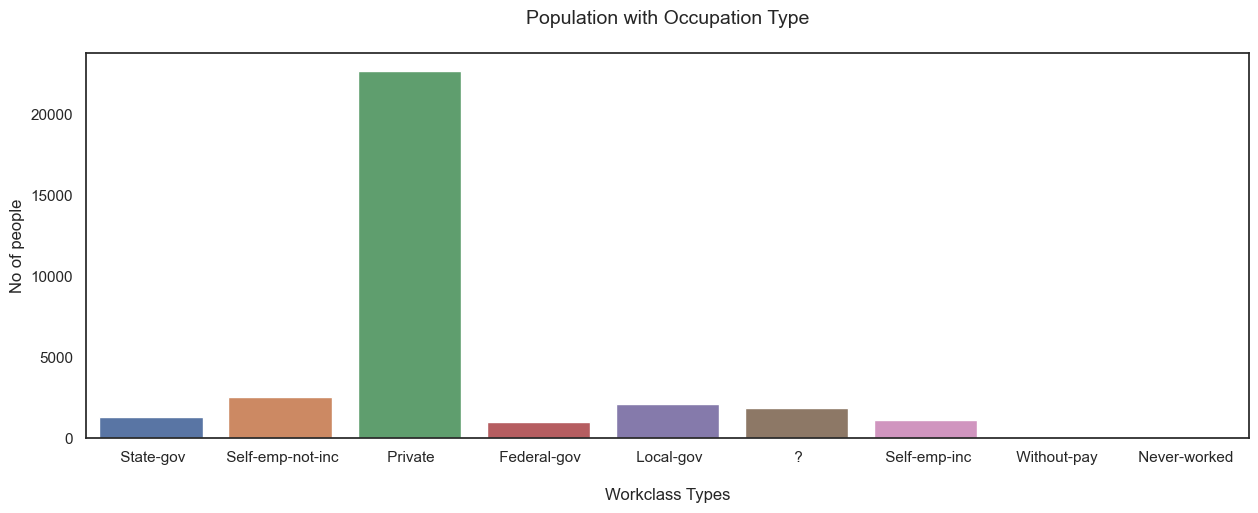

In [43]:
#Creating bargraph for workclass
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="workclass", data=df)
plt.title("Population with Occupation Type\n",size =14)
plt.ylabel("No of people")
plt.xlabel("\nWorkclass Types")

Text(0.5, 0, '\n Education Level')

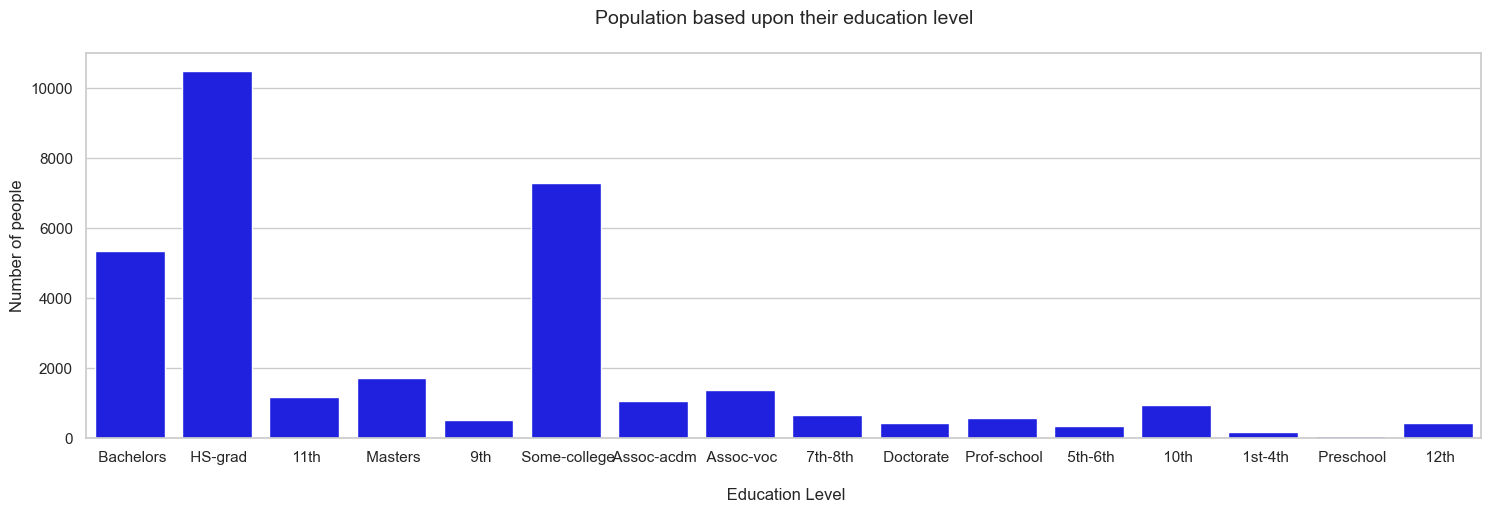

In [44]:
#Bargraph representing number of people with different education level
plt.figure(figsize=(18,5))
sns.set(style = 'whitegrid')
sns.countplot(x="education", data=df,color='blue')
plt.title("Population based upon their education level\n",size=14)
plt.ylabel("Number of people")
plt.xlabel("\n Education Level")

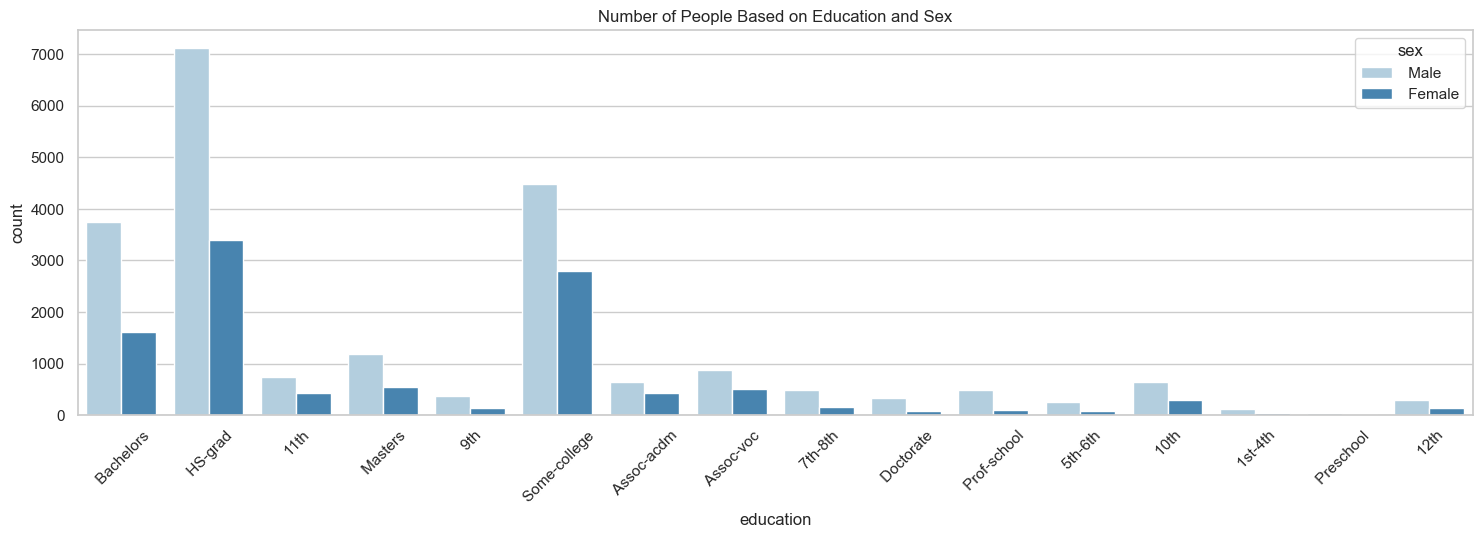

In [45]:
plt.figure(figsize=(18,5))
sns.countplot(x="education", data=df, hue="sex", palette="Blues")
plt.title("Number of People Based on Education and Sex")
plt.xticks(rotation=45)
plt.show()


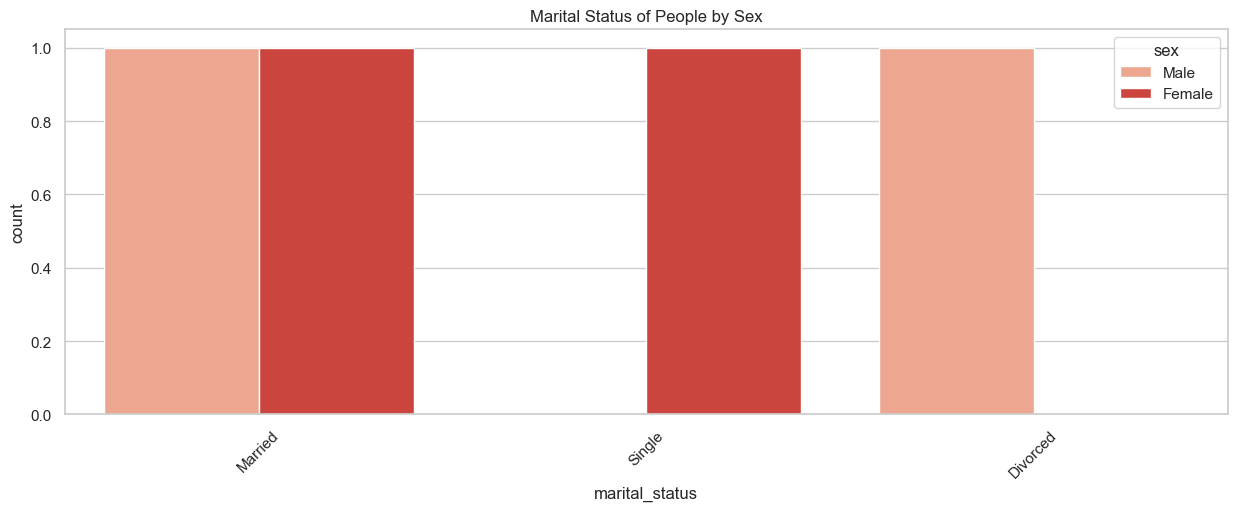

In [46]:
sample_df = pd.DataFrame({
    'marital_status': ['Married', 'Single', 'Married', 'Divorced'],
    'sex': ['Male', 'Female', 'Female', 'Male']
})

plt.figure(figsize=(15,5))
sns.countplot(x="marital_status", data=sample_df, hue="sex", palette="Reds")
plt.title("Marital Status of People by Sex")
plt.xticks(rotation=45)
plt.show()


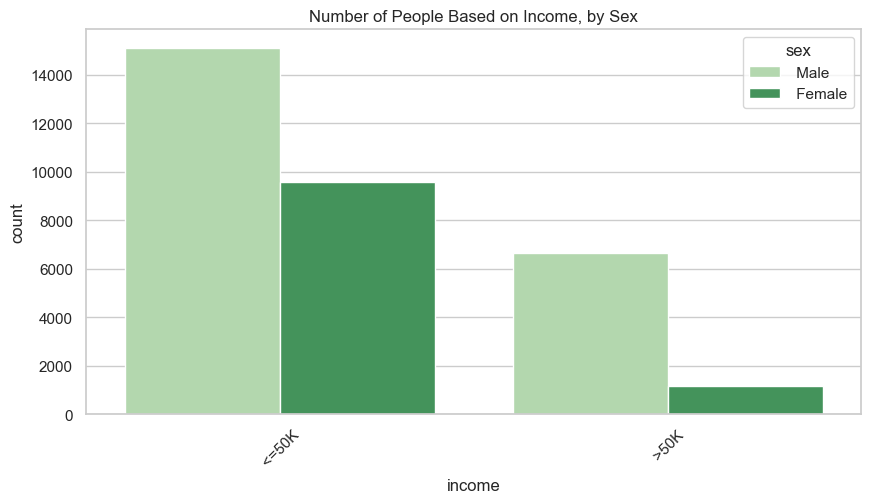

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your DataFrame 'df' is correctly defined and includes the 'income' and 'sex' columns.

plt.figure(figsize=(10,5))
sns.countplot(x="income", data=df, hue="sex", palette="Greens")
plt.title("Number of People Based on Income, by Sex")
plt.xticks(rotation=45)  # Adjust the rotation of x labels if needed for clarity
plt.show()


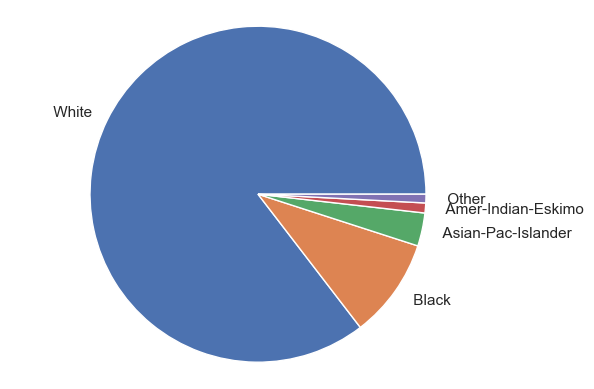

In [48]:
#Piechart showing representation of race in dataset
fig1, ax1 = plt.subplots()
X = list(df['race'].value_counts().index)
Y = list(df['race'].value_counts().values)
ax1.pie(Y,labels=X)
ax1.axis('equal') 
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16192\676848189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],bins=8)


Text(0.5, 1.0, 'Age Histogram')

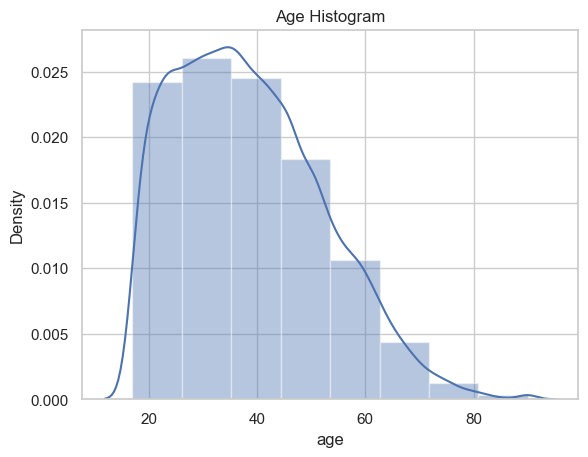

In [49]:
#Histogram representing age
sns.distplot(df['age'],bins=8)
plt.title("Age Histogram")

Text(0.5, 1.0, 'Box plot representing age and income \n')

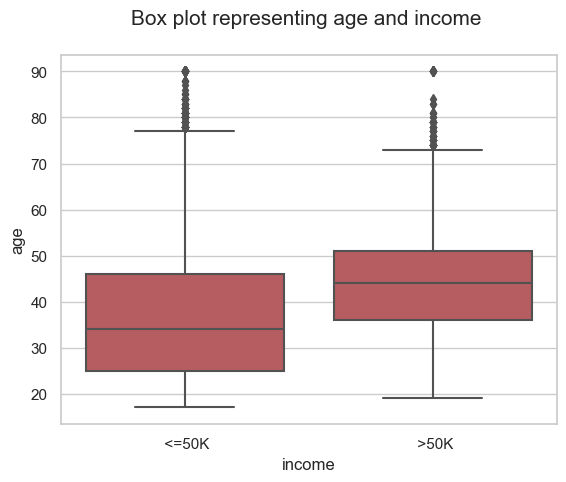

In [50]:
#Variation between age and income level
sns.boxplot(x=df['income'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Box plot representing age and income \n')

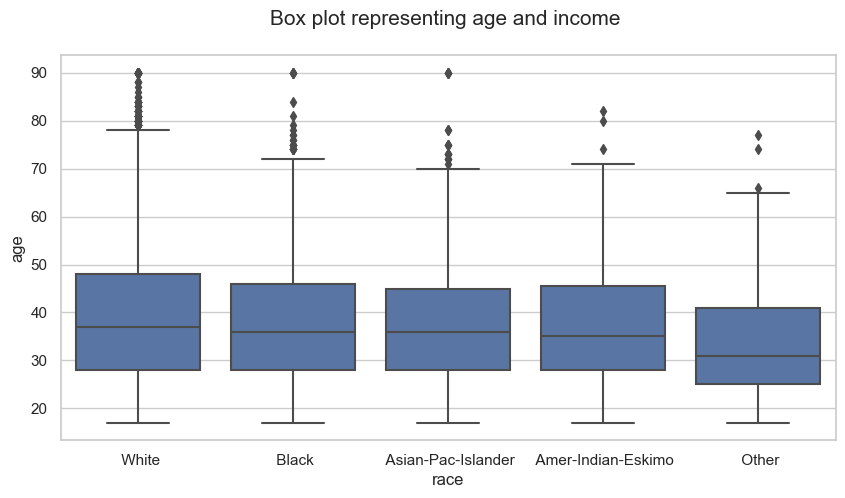

In [51]:
#Variation between race and age
plt.figure(figsize=(10,5))
sns.boxplot(x=df['race'],y=df['age'],color='b')
plt.title("Box plot representing age and income \n", size = 15)

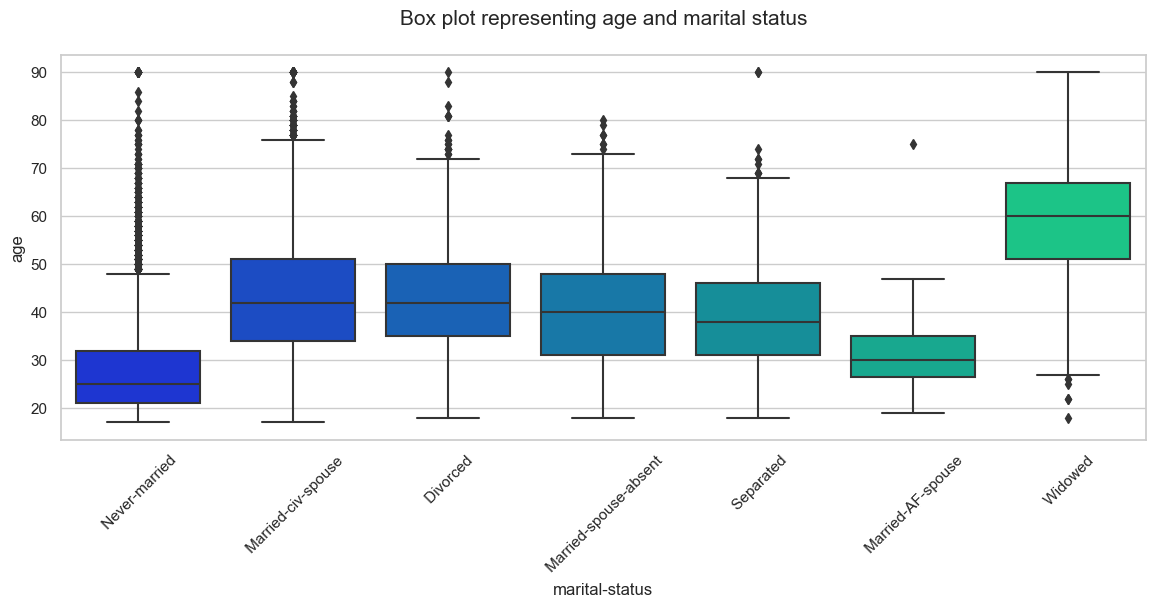

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your DataFrame 'df' is correctly defined and includes the needed columns

plt.figure(figsize=(14,5))
sns.boxplot(x=df['marital-status'], y=df['age'], palette='winter')  
plt.title("Box plot representing age and marital status\n", size=15) 
plt.xticks(rotation=45)  # Adjust rotation if needed
plt.show()


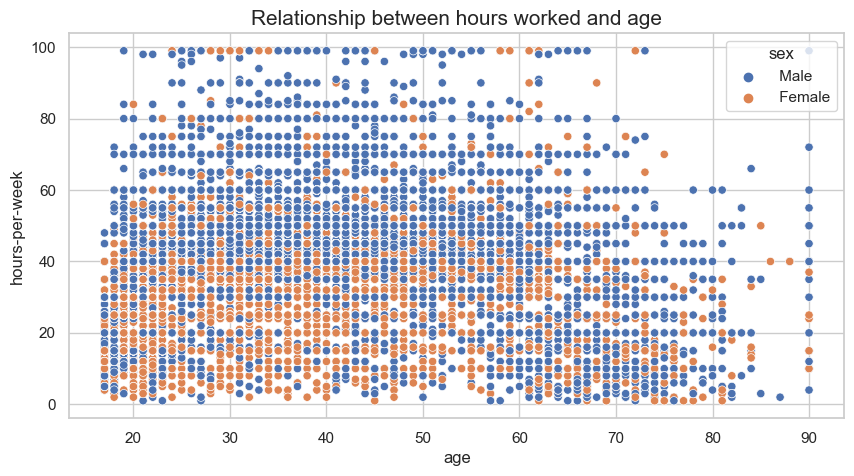

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame 'df' is correctly defined and includes the 'age', 'hours-per-week', and 'sex' columns

plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='hours-per-week', hue='sex', data=df)
plt.title('Relationship between hours worked and age', size=15)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


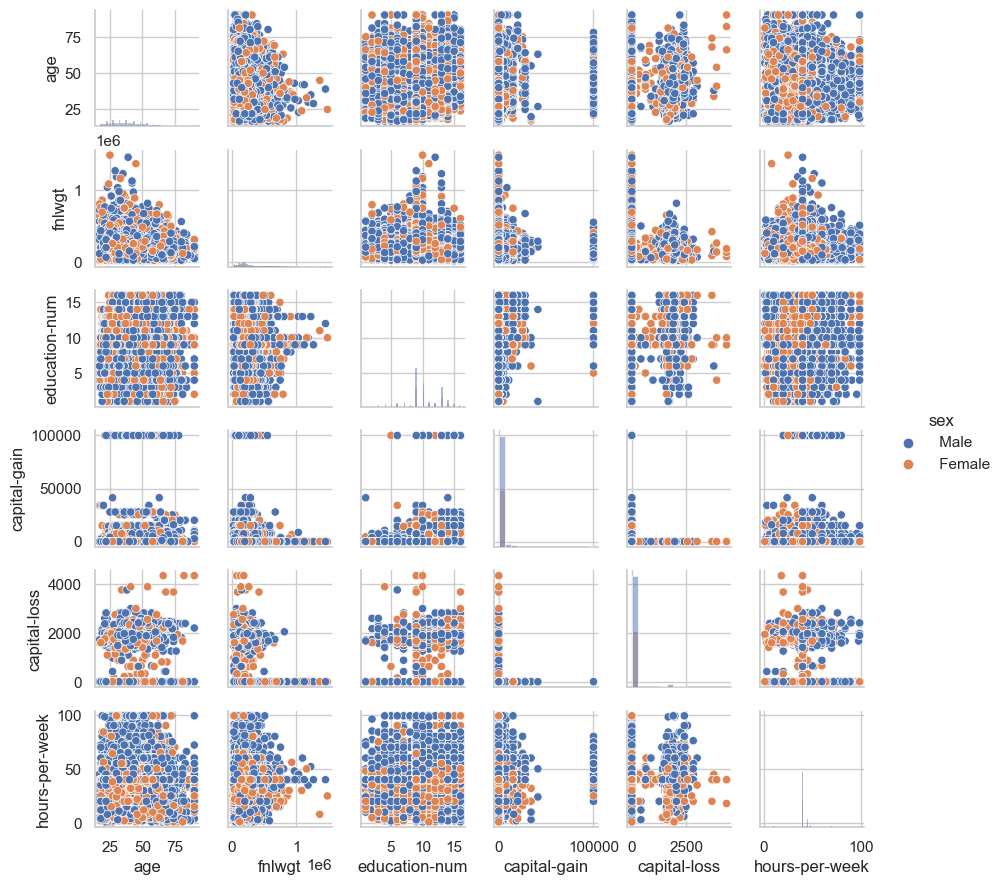

In [54]:
#pairplot to determine relationship between all the quantitative variables
sns.pairplot(df,height =1.5, hue="sex", diag_kind="hist")

In [55]:
import warnings
warnings.filterwarnings("ignore")


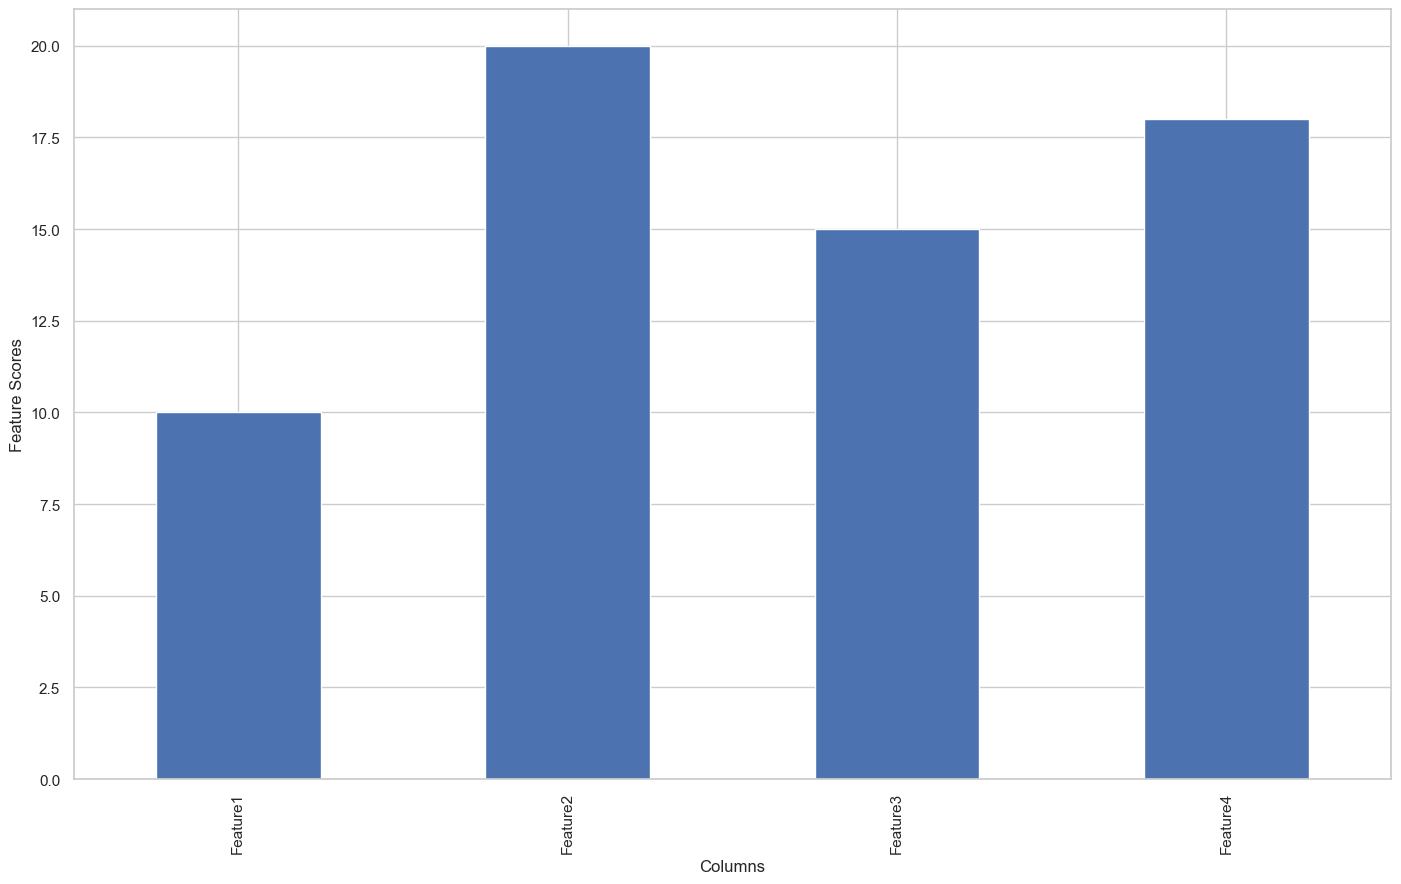

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data generation for ft_scores (replace this with your data)
data = {'Feature1': 10, 'Feature2': 20, 'Feature3': 15, 'Feature4': 18}
ft_scores = pd.Series(data)

plt.figure(figsize=(17, 10))
plt.xlabel('Columns')
plt.ylabel('Feature Scores')
ft_scores.plot(kind='bar')
plt.show()
